# Hand In 3 - Frequent patterns

Welcome to the handin on frequent patterns. 
This handin corresponds to the topics in Week 16--19 in the course.

The handin IS 
* done in groups of two people
* worth 10% of the grade

For the handin, you will prepare a report in PDF format, by exporting the Jupyter notebook. 
Please submit
1. The jupyter notebook file with your answers
2. The PDF obtained by exporting the jupyter notebook

Submit both files on Blackboard no later than **May 22nd kl. 23.59**.

**The grading system**: Tasks are assigned a number of points based on the difficulty and time to solve it. The sum of
the number of points is **80**. For the maximum grade you need to get at least _65 points_. The minimum grade (02 in the Danish scale)
requires **at least** 24 points, with at least 8 points on of the first three Parts (Part 1,2,3).
Good luck!

**The exercise types**: There are three different types of exercises
1. <span style='color: green'>**\[Compute by hand\]**</span> means that you should provide NO code, but show the main steps to reach the result (not all). 
2. <span style='color: green'>**\[Motivate\]**</span> means to provide a short answer of 1-2 lines indicating the main reasoning, e.g., the PageRank of a complete graph is 1/n in all nodes as all nodes are symmetric and are connected one another.
3. <span style='color: green'>**\[Describe\]**</span> means to provide a potentially longer answer of 1-5 lines indicating the analysis of the data and the results. 
4. <span style='color: green'>**\[Prove\]**</span> means to provide a formal argument and NO code. 
5. <span style='color: green'>**\[Implement\]**</span> means to provide an implementation. Unless otherwise specified, you are allowed to use helper functions (e.g., ```np.mean```, ```itertools.combinations```, and so on). However, if the task is to implement an algorithm, by no means a call to a library that implements the same algorithm will be deemed as sufficient! 

In [2]:
import itertools
from itertools import combinations

import numpy as np
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

import tabulate
from tqdm import tqdm

import sys
sys.path.append('../utilities')
#from load_data import load_dblp_citations

# Part 1: Subgraph mining (25 Points)
In this part, we will work with subgraph mining algorithms. We will first solve some theory exercises and then implement two simple algorithms. 

## Task 1.1 DFS codes (13 Points)

### Task 1.1.1 (6 Points)
<span style='color: green'>**\[Compute by hand\]**</span> Find the canonical (i.e., minimal) DFS code for the graph below. Try to eliminate some codes without generating the complete search tree. *Hint*: you can eliminate a code if you can show that it will have a larger code than some other code (e.g., using label ordering, degree). 

<div>
<img src="images/dfs-codes.png" width="300">
</div>

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.1.2 (4 Points)
<span style='color: green'>**\[Describe\]**</span> an extension to the DFS-code notation and the rules for the lexicographic ordering that handles the case of *directed* graphs. If that is not possible, state why.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.1.3 (3 Points)
 <span style='color: green'>**\[Describe\]**</span> (no need for pseudocode) a suitable way to find the _maximum_ DFS-code from the rules for _minimum_ DFS-codes that you already know from the lecture.

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 1.2 Maximum Independent Set (12 Points)

### Task 1.2.1 (6 Points)
<span style='color: green'>**\[Describe\]**</span>  Sketch a proof that the Maximum Independent Set (MIS) support is anti-monotone, i.e., the support of a pattern $P'$ is no larger than _any_ pattern $P$ included in $P'$ (that is, $P$ is a sub-pattern of $P'$). To guide you into the proof, start from a set of matchings of the pattern $P'$ which corresponds to an independent set of nodes $I'$ in the overlap graph $G'_{O}$, same for the set of nodes $I$ in the overlap graph $G_O$ of $P$. Observe (_Observation 1_) that the **all** the matchings $f'$ of $P'$ contain matchings $f$ of $P$. Also observe (_Observation 2_) that if you take two matchings $f_1'$ and $f_2'$ of $P'$ and the corresponding matchings $f_1$ and $f_2$ of $P$ overlap, so do the matchings $f_1'$ and $f_2'$. Given these two observation what can you deduce on the independent sets $I'$ of $G'_O$ and $I$ of $G_O$?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 1.2.2 (6 Points)

<span style='color: green'>**\[Implement\]**</span> In this exercise, we will program a simplified version of the Maximum Indepent Set (MIS) support. Your exercise is to construct an algorithm that takes in input a pattern $P$ and the matches of the pattern in the graph $G$ and finds the Maximum Independent Set (MIS) support. Since finding the MIS is NP-hard your exercise is to implement a simple greedy approximation  algorithm. To test the code you can use the graph and code below. 

In [ ]:
def mis_support(P, matches): 
    """
    Returns the MIS support of a pattern. 

    Parameters
    ----------
    P:       The pattern represented as a networkx undirected graph object
    matches: A list of subgraph isomorphic matches. Each match is a dictionary id_node_pattern -> id_node_graph
    """
    mis = 0
    ### YOUR CODE HERE

    ### YOUR CODE HERE
    return mis

In [ ]:
from networkx.algorithms import isomorphism

# Example pattern
P = nx.Graph()
P.add_nodes_from([(1,{"label":"A"}), (2,{"label":"B"}), (3,{"label":"C"})])
P.add_edges_from([(1,2),(2,3)])
labels = nx.get_node_attributes(P, 'label') 
plt.figure(1)
nx.draw(P,labels=labels)

# Example graph
G = nx.read_gml("data/graph.gml", label='id')
labels = nx.get_node_attributes(G, 'label') 
pos = nx.spring_layout(G)
plt.figure(2)
nx.draw(G,pos, labels=labels)

plt.show()

# Find the matches of P in G
nm = isomorphism.GraphMatcher(G,P,node_match=isomorphism.categorical_node_match("label", "A"))
matches = []
for subgraph in nm.subgraph_monomorphisms_iter():
    matches.append(subgraph)
    print(subgraph)
    
print("The MIS support for pattern %s in G is: %f" %(P.nodes, mis_support(P, matches)))


In [ ]:
### EXTRA CODE BLOCK HERE

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

# Part 2: Frequent itemsets (25 Points)
We have learned the Apriori and FP-Growth algorithms for mining frequent itemsets. In this part, we will implement these algorithms and test them against each other. 

We will use the anonymized real-world `retail market basket` data from: http://fimi.ua.ac.be/data/.
This data comes from an anonymous Belgian retail store, and was donated by Tom Brijs from Limburgs Universitair Centrum, Belgium. The original data contains 16,470 different items and 88,162 transactions. You may only work with the top-50 items in terms of occurrence frequency.
_Hint:_ We have used this dataset before.

The variable **retail_small** contains the top-50.

In [4]:
from utilities.load_data import load_market_basket


def filter_transactions(T, k=50):
    """
        Keep only the top k items in the transactions.
        Remove transactions that become empty.
    """
    # Count occurences of each item
    counts = [0] * 16470
    for t in T:
        for i in t:
            counts[i] += 1

    # Sort and select top k
    counts = np.array(counts)
    order  = np.argsort(counts)[::-1] # reverse the sorted order

    indexes_to_keep = order[:k]       # Keep the top k items
    index_set = set(indexes_to_keep)  # Convert to python set for efficiency

    # Filter transactions
    T_new = [t_ for t_ in  [list(filter(lambda i: i in index_set, t)) for t in T]  if t_]
    return T_new

retail = load_market_basket()
retail_small = filter_transactions(retail)

## Task 2.1 Association Rules (4 Points)
Consider the following table

| transaction ID 	| Items           	|
|----------------	|-----------------	|
| 1              	| Ape,Cat,Dog,Cow     	|
| 2              	| Cat,Dog,Pig,Cow 	|
| 3              	| Dog,Bat,Pig,Cow 	|
| 4              	| Dog,Pig,Cow     	|
| 5              	| Dog,Cow         	|
| 6              	| Cat,Cow         	|
| 7              	| Ape,Bat,Fox     	|
| 8              	| Ape,Cow         	|
| 9              	| Ape,Dog,Cow     	|


### Task 2.1.1 (0.5 Points)
<span style='color: green'>**\[Motivate\]**</span> What is the count of the itemset {Dog,Pig,Cow} ?

*******************
The itemset $\{Dog,Pig,Cow\}$ is present i transactions 2,3 and 4 so the count is 3.
******************

### Task 2.1.2 (0.5 Points)
<span style='color: green'>**\[Motivate\]**</span>What is the support and confidence of the association rule {Dog,Pig}->Cow ?

*******************
With 9 total transactions and count 3 the support of the rule is $\frac{3}{9}=\frac{1}{3}$<br>
Confidence of the rule is $\frac{support(\{Dog,Pig\} \cup \{Cow\})}{support(\{Dog,Pig\})}=\frac{3}{3}=1$
******************

### Task 2.1.3 (1.5 Point)
<span style='color: green'>**\[Compute by hand\]**</span> Consider the application of the Apriori algorithm to find all the frequent itemsets
whose counts are at least 3.

*******************
Candidate set $C_1$<br>

| itemset 	| count           	|
|----------------	|-----------------	|
| Ape              	| 4   	|
| Cat              	| 3 	|
| Dog              	| 6 	|
| Cow              	| 8     	|
| Pig              	| 3        	|
| Bat              	| 2        	|
| Fox              	| 1     	|

<br>
frequent itemsets $L_1$:<br>

| itemset 	| count           	|
|----------------	|-----------------	|
| Ape              	| 4   	|
| Cat              	| 3 	|
| Dog              	| 6 	|
| Cow              	| 8     	|
| Pig              	| 3        	|

<br>
Candidate set $C_2$:<br>


| itemset 	| count           	|
|----------------	|-----------------	|
|\{Ape,Cat\} | 1|
|\{Ape,Cow\} | 3|
|\{Ape,Dog\} | 2|
|\{Ape,Pig\} | 0|
|\{Cat,Cow\}| 3|
|\{Cat,Dog\} | 2|
|\{Cat,Pig\}| 1|
|\{Cow,Dog\}|6|
|\{Cow,Pig\}|3|
|\{Dog,Pig\} | 3|


frequent itemsets $L_2$:<br>

| itemset 	| count           	|
|----------------	|-----------------	|
|\{Ape,Cow\} | 3|
|\{Cat, Cow\}| 3|
|\{Cow,Dog\} | 6|
|\{Dog,Pig\} | 3|
|\{Cow,Pig\} | 3|

Candidate set $C_3$:<br>


| itemset 	| count           	|
|----------------	|-----------------	|
|\{Cow,Dog,Pig\} | 3|

There are no more itemsets to join, so all frequent itemsets are

| itemset 	| count           	|
|----------------	|-----------------	|
| Ape              	| 4   	|
| Cat              	| 3 	|
| Dog              	| 6 	|
| Cow              	| 8     	|
| Pig              	| 3        	|
|\{Ape,Cow\} | 3|
|\{Cat, Cow\}| 3|
|\{Cow,Dog\} | 6|
|\{Dog,Pig\} | 3|
|\{Cow,Pig\} | 3|
|\{Cow,Dog,Pig\} | 3|

******************


### Task 2.1.4 (1.5 Point)
<span style='color: green'>**\[Compute by hand\]**</span> Find all the association rules with support at least 1/3 and confidence at least 1/2.


*******************
We can't construct any association rules from the itemsets of size 1, so we will not consider those

From 9 transaction we know, that if an itemset has count $\geq 3$ then the support of the rule will be at least $\frac{1}{3}$, so we can consider only the frequent itemsets found.<br>

| Association Rule 	| Confidence           	|
|----------------	|-----------------	|
| Ape => Cow | $\frac{3}{4}$ |
| Cow => Ape | $\frac{3}{8}$ |
| Cat => Cow | $\frac{3}{3}$ |
| Cow => Cat | $\frac{3}{8}$ |
| Cow => Dog | $\frac{6}{8}$|
| Dog => Cow | $\frac{6}{6}$|
| Dog => Pig | $\frac{3}{6}$|
| Pig => Dog | $\frac{3}{3}$|
| Cow => Pig | $\frac{3}{8}$|
| Pig => Cow | $\frac{3}{3}$|
| Cow => \{Pig,Dog\} | $\frac{3}{8}$ |
| Dog => \{Pig,Cow\} | $\frac{3}{6}$ |
| Pig => \{Dog,Cow\} | $\frac{3}{3}$ |
| \{Cow,Dog\} => Pig | $\frac{3}{6}$ |
| \{Cow,Pig\} => Dog | $\frac{3}{3}$ |
| \{Pig,Dog\} => Cow | $\frac{3}{3}$ |

So the association rules with confidence $\geq \frac{1}{2}$ are:

| Association Rule 	| Confidence           	|
|----------------	|-----------------	|
| Ape => Cow | $\frac{3}{4}$ |
| Cat => Cow | $\frac{3}{3}$ |
| Cow => Dog | $\frac{6}{8}$|
| Dog => Cow | $\frac{6}{6}$|
| Dog => Pig | $\frac{3}{6}$|
| Pig => Dog | $\frac{3}{3}$|
| Pig => Cow | $\frac{3}{3}$|
| Dog => \{Pig,Cow\} | $\frac{3}{6}$ |
| Pig => \{Dog,Cow\} | $\frac{3}{3}$ |
| \{Cow,Dog\} => Pig | $\frac{3}{6}$ |
| \{Cow,Pig\} => Dog | $\frac{3}{3}$ |
| \{Pig,Dog\} => Cow | $\frac{3}{3}$ | 

******************

## Task 2.2 A Priori algorithm (9 Points)

### Task 2.2.1(7 Points)
<span style='color: green'>**\[Implement\]**</span> Develop an implementation of the Apriori algorithm. You can look at your implementation from the exercises (note that this one is slightly different to simplify comparison with FP-Growth).

In [ ]:
def apriori_algorithm(T, min_support=10):
    """
        Apriori algorithm for mining frequent itemsets and association rules. 
        This implementation should just find frequent itemsets, and ignore the rule generation.
        Inputs:
            T:               A list of lists, each inner list will contiain integer-item-ids. 
                             Example: T = [[1, 2, 5], [2, 3, 4], [1, 6]]
            min_support:     int: The total number of occurences needed for an itemset to be considered frequent
        
        Outputs:
            itemsets:        Dictionary of with keys as frequent itemset, and value as the total count of this itemset 
    """
    itemsets = dict()
    ### TODO Your code here
    
    ### TODO Your code here
    return itemsets

def compute_candidates(prev_itemset):
    Ck = set()
    # Join step
    for itemset in prev_itemset:
        its1 = tuple(sorted(itemset))
        for itemset2 in prev_itemset:
            its2 = tuple(sorted(itemset2))
            if its1[:-1] == its2[:-1]:
                if its1[-1] < its2[-1]: Ck.add(its1 + its2[-1:])

    # Pruning step
    to_remove = set()
    for c in Ck:
        for subset in combinations(c, len(c)-1):
            if not subset in prev_itemset:
                to_remove.add(c)
                break
    for c in to_remove:
        Ck.remove(c)
    
    return Ck

### Task 2.2.2 (2 Points)
<span style='color: green'>**\[Implement\]**</span> Run Apriori on the data-set (using the **retail** variable and not the small one). Try a few different values of min_support. </br>
<span style='color: green'>**\[Describe\]**</span>Roughly how large does min_support need to be before no itemsets of size 2 are found? (You don't need to find the excact value. Nearest 1000 is fine).

Note that the dataset is reasonably large, so this **can take up a large amount of time depending on your value of min support and implementation.**

In [ ]:
apriori_algorithm(retail, 5000)

******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 2.3 FP-Growth (9 Points)

### Task 2.3.1 (7 Points)
<span style='color: green'>**\[Implement\]**</span> Complete the implementation of FP-Growth below. You only need to implement growing the tree and building the header table. It is clearly marked where you need to implement.

In [ ]:

class FP_Tree:
    def __init__(self, T, min_support=10):
        """
        Constructor for FP_Tree. Should correctly build an FP-Tree with header table.
        Hint: I strongly advise you to implement the missing sections of the Node class before this one
        
        Inputs:
            T:               A list of lists, each inner list will contiain integer-item-ids. 
                             Example: T = [[1, 2, 5], [2, 3, 4], [1, 6]]
            min_support:     The total number of occurences needed to keep the itemset.
        """
        self.min_support    = min_support
        self.header_table   = {}
        self.root           = Node(header_table = self.header_table)
        
        ### YOUR CODE HERE
        
        ### YOUR CODE HERE
    
    
    ### Common functions for FP-tree and Conditional FP-tree
    ### You do not need to modify the rest of this class
    def generate_pattern(self, keys, support):
        return tuple(keys + self.get_suffix()), support
    
    def get_suffix(self):
        return []
    
    # This is the main function for generating frequent itemsets. You do not need to modify this,
    # but I recommend reading and trying to understand it.
    def mine_frequent_itemsets(self, res=None):
        if res is None: res = []
        
        if self.root.is_single_path():
            keys = list(self.header_table.keys())
            key_idx = {k:i for i, k in enumerate(keys)}
            counts = [self.header_table[k].count for k in keys]
            
            for key_pair in itertools.chain(*[itertools.combinations(keys, k) for k in range(1, len(keys)+1)]):
                support = min([counts[key_idx[k]] for k in key_pair])
                if support >= self.min_support: 
                    res.append(self.generate_pattern(list(key_pair), support))
         
        else: # Not single path
            for key, node in self.header_table.items():
                support = node.support()
                
                if support >= self.min_support:
                    res.append( self.generate_pattern([key], support) )
                
                basis = []
                while node is not None:
                    curr_node = node
                    node = node.nodelink
                    
                    if curr_node.parent is None:  continue
                        
                    path = curr_node.path(limit=curr_node.count)[:-1]
                    if len(path) == 0:  continue
                        
                    basis.append( path )
                    
                if len(basis) == 0: continue
                    
                conditional_tree = Conditional_FP_Tree(self.min_support, [key] + self.get_suffix(), basis)
                if conditional_tree.root is None: continue
                    
                conditional_tree.mine_frequent_itemsets(res=res)
        return res


# You don't need to modify anything in this class
class Conditional_FP_Tree(FP_Tree):
    def __init__(self, min_support, suffix, basis): 
        self.min_support    = min_support
        self.suffix         = suffix
        self.header_table   = {} # This will hold all unique items
        
        self.root           = Node(header_table=self.header_table)
        
        self.build_tree(basis)
        # self.root           = prune(self.root, min_support)
        if self.root is None: print("WARNING: root is empty after pruning")
        
    def build_tree(self, basis):
        for b in basis:
            count = b[0][1]
            path = list(map(lambda x: x[0], b))
            for i in range(count):
                self.root.add_path(path)
    
    def get_suffix(self):
        return self.suffix

class Node:
    def __init__(self, header_table, value=None, parent=None, path=None):
        """
        Constructor for Node class, which is used for the FP-Tree. 
        Inputs:
            header_table:    Dict. Should be same dict for all nodes in the tree
            value:           Integer id of the item the node represents
            parent:          Parent Node. None if root node
            path:            List of node values for a path that should start in this node.
        """
        
        self.children     = {}
        self.header_table = header_table 
        self.nodelink     = None
        self.value        = None
        self.parent       = None
        self.count        = 0
        
        if value is not None: # Only root node should have None as value
            self.value          = value
            self.parent         = parent
            # YOUR CODE HERE

            # YOUR CODE HERE
        
        if path is not None: 
            self.add_path(path)
            
    
    def add_path(self, path):
        """
        Function for adding a path to tree. 
        Should follow an existing path and increment count while such a path exists. 
        If no path exists (or only partial path exists), this function should create or complete such a path
        Hint: Recursion might be helpful.
        Inputs:
            path:            A list node values. 
                             Example: path = [1, 2, 5]
        """
        
        ### YOUR CODE
        
        ### YOUR CODE
    
    
    # Functions for frequent items-sets and rule mining below. You do not need to modify these
    def is_single_path(self):
        if   len(self.children) == 0: return True 
        elif len(self.children) >  1: return False
        else:  # len == 1
            key = next((k for k in self.children.keys()))
            return self.children[key].is_single_path()
    
    def support(self, verbose=False):
        if verbose: print("Counting support, this value is ", self.value, " with count ", self.count, " and parent ", self.parent.value)
            
        if self.nodelink is not None: return self.count + self.nodelink.support(verbose)
        else:                         return self.count
    
    def path(self, limit=-1):
        if self.value is None: 
            return []
        else:                  
            count = self.count if limit == -1 else min(self.count, limit)
            return self.parent.path(limit=limit) + [(self.value, count)]
    
    def print(self, indent="", spacing="----|-"):
        print(indent + str(self.value) + ":" + str(self.count))
        for v in self.children.values():
            v.print(indent=indent + spacing)
            



In [ ]:
### YOUR TEST CODE HERE

### Task 2.3.2 (2 Points)
<span style='color: green'>**\[Implement\]**</span> Run FP-Growth on the data-set (using the **retail** variable and not the small one). Try a few different values of min_support. </br>
<span style='color: green'>**\[Describe\]**</span> Roughly how large does min_support need to be before all itemsets of size 1 and 2 are found but no itemsets of size 3? (You don't need to find the excact value. Nearest 1000 is fine)

In [ ]:
### YOUR CODE HERE

## Task 2.4 Comparing A priori and FP-Growth (3 Points)
<span style='color: green'>**\[Describe\]**</span> Run the given experiment and show to what extent FP-Growth has an advantage. Comment on the results. What do you see? What do you expect to see?

In [ ]:
# Script for testing the runtime of your algorithms. 
# WARNING: This will take a reasonably long time to run.

import numpy as np
import time
    
def sample(n=200, alphabet_size=5):
    candidates  = np.array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'])[:alphabet_size]
    m = candidates.shape[0]
    
    T = []
    for i in range(n):
        size = int(np.random.rand() * (m)) + 1
        T.append(list(candidates[np.random.permutation(m)[:size]]))
        
    return T

def test():
    # If you want to test it quickly, you can modify "transaction_lengths" and "alphabet_sizes" temporarily. 
    # This will give you errors in the plotting (next code cell) though.
    # Make sure you use the original values for "transaction_lengths" and "alphabet_sizes" for your final version.
    transaction_lengths = [2**i for i in range(4, 11)]
    alphabet_sizes      = [3, 6, 9, 12] 
    
    min_support = 10
    repeats     = 10
    
    stop = False
    results = np.zeros((len(transaction_lengths), len(alphabet_sizes), 2))
    stderrs = np.zeros((len(transaction_lengths), len(alphabet_sizes), 2))
    
#     print(results.shape)
    
    for i, n in enumerate(transaction_lengths):
        for j, a in enumerate(alphabet_sizes):
            print(" - - " * 4, "n=%d,a=%d" % (n, a), " - - " * 4)
            times = []
            for _ in range(repeats):
                T = sample(n, a)

                t0 = time.time()
                tree = FP_Tree(T, min_support=min_support)
                frequent_itemsets = tree.mine_frequent_itemsets()
                t1 = time.time() - t0

                i1 = {tuple(sorted(list(k))): v for k, v in frequent_itemsets}

                t0 = time.time()
                itemsets = apriori_algorithm(T, min_support=min_support)
                t2 = time.time() - t0

                i2 = {}
                for V in itemsets.values():
                    for k, v in V.items():
                        i2[tuple(sorted(list(k)))] = v

                assert len(i1) == len(i2)
                for k in i1.keys():
                    assert i1[k] == i2[k]

                times.append([t1, t2])

            results[i, j] = np.mean(times, axis=0)
            stderrs[i, j] = np.std(times, axis=0)
            print(np.mean(times, axis=0), "+-", np.std(times, axis=0), "\n")
            
    np.save('itemsets_runningtimes', results)  # Results are saved to avoid having to run it again if plot code needs changing
    np.save('itemsets_stderr', stderrs)
    
    return results, stderrs
        
results, stderrs = test()     



In [ ]:
import matplotlib.pyplot as plt

results = np.load('itemsets_runningtimes.npy')
stderrs = np.load('itemsets_stderr.npy')

# Plotting 
transaction_lengths = [2**i for i in range(4, 11)]
alphabet_sizes      = [3, 6, 9, 12] 

n, a, _ = results.shape
res_to_plot = np.transpose(results, (1, 0, 2))
err_to_plot = np.transpose(stderrs, (1, 0, 2))

fig, ax = plt.subplots(1, a, figsize=(4*a, 4))
for i, (res, err) in enumerate(zip(res_to_plot, err_to_plot)):
    ax[i].plot(transaction_lengths, res[:,0], label='FP-Tree', color='C1')
    ax[i].fill_between(transaction_lengths, res[:,0] - err[:,0], res[:,0] + err[:,0], alpha=0.3, linewidth=0 , color='C1')
    
    x = transaction_lengths[-1]
    ax[i].set_xlim((2**4, 2**11))
    ax[i].annotate(text='', xy=(x, res[-1,0]), xytext=(x,res[-1,1]), arrowprops=dict(arrowstyle='|-|'))
    ax[i].annotate(text='%.1f $\\times$'%(res[-1,1]/res[-1,0]), xy=(x-24,  (res[-1,1] / 2 + res[-1,0]/2)), horizontalalignment='right')
    
    ax[i].plot(transaction_lengths, res[:,1], label='Apriori', color='C2')
    ax[i].fill_between(transaction_lengths, res[:,1] - err[:,1], res[:,1] + err[:,1], alpha=0.3, linewidth=0 , color='C2')
    
    ax[i].set_title("Alphabet size: %d" % alphabet_sizes[i])
    ax[i].set_xscale('log', base=2)
    ax[i].legend()
    ax[i].set_xlabel('Number of transactions')
    ax[i].set_ylabel('Seconds')

plt.tight_layout()
    

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

# Part 3: Sequence Segmentation and LSH (30 Points)
The Dynamic Programming algorithm for optimally segmenting a sequence $S$ of length $n$ 
into $B$ segments, that we have introduced, is expressed by the following recursive equation:

$$
E(i, b) = \min_{j < i}\left[ E(j, b-1) + Err(j+1, i)\right]
$$

where $Err(j+1, i)$ is the error of a segment that contains items from $j+1$ to $i$.

In this part, you will have to answer some questions on this.

**Note:** 
For those of you, who are not used to analyzing algorithms: by time-complexity and space-complexity, 
we refer to the theoretical computation time and memory usage, respectively, as a function of the problem size, i.e., as a 
function of $n$ and $B$ in Problem 3. We use [Big O notation](https://en.wikipedia.org/wiki/Big_O_notation)
to specify this. You should **not** infer it by implementing it in practice ;-) 
Again, when in doubt, ask on Discord, Blackboard or shoot Jon an email. 

## Task 3.1 Sequence segmentation (20 Points)

************
<span style='color: red'>**These questions are hard. First complete the rest of the exercises and then come back to solve 3.1.**</span>
************


### Task 3.1.1
<span style='color: green'>**\[Describe\]**</span> what is the default space-complexity of this algorithm?

*******************
Well the default space-complexity of the above given algorithm is $\mathcal{O}(n \cdot B)$ because the recursive algorithm has to fill a two-dimensional table. The dimentions of this table is given by the sequence length $n$ and the segments size $B$. 
******************

### Task 3.1.2 
<span style='color: green'>**\[Describe\]**</span> what happens if we are willing to recompute some tabulated results. Can we then reduce the default space-complexity? _Exactly how_? What is the space-complexity then?

*******************
If we are willing to recompute some of the tabulated results in the dynamic programming algorithm, it is possible to reduce the space complexity by using a method called _Rolling Computation_. In the default approach as described above, we use a $n \cdot B$ size two dimensional table in order to store the computed values. However, in the _Rolling Computation_ approach we only need to maintain two rows of the table at any given time. We simply start initializing two rows and through a iterative process, we fill in the table row by row, starting from the first row. Whenever the calculations of are complete, we update the values of the second row using the values from the first row. <br>
By doing the above we decrease the space complexity to that of $\mathcal{O}(n)$, as we only need to store two rows at a time instead of the entire $B$ rows. Again this is because we can recompute the values for the current row using the values from the previous row.
******************

### Task 3.1.3 
<span style='color: green'>**\[Motivate\]**</span> what is the cost of using the space-efficiency technique described in Task 3.1.2 in terms of time-complexity.

*******************
In terms of the time-complexity of using the above described method, we still have the same time-complexity. The recomputation of tabular values does not affect the overall time complexity. However, the _Rolling Computation_ approach might have a higher constant time factor compared to the default approach. This is due to the fact that recomputing values for each row can introduce additional computational overhead compared to simply looking up precomputed values from a fully populated table. But again this will have no effect on the overall time complexity. 
******************

### Task 3.1.4 
For the sub-problem of segmenting the $i$-prefix of sequence $S$ into $b$ segments, consider 
    the segment $M(i, b)$ that contains (if such segment exists) the middle item of 
    index $\lfloor \frac{n}{2} \rfloor$. The boundaries of $M(i, b)$ can be detected and tabulated 
    along with each $E(i, b)$ solution. 

<span style='color: green'>**\[Describe\]**</span> a method that reduces the time-complexity burden identified in Task 3.1.3, based on the above observarion. 
    _(hint: use [divide-and-conquer](https://en.wikipedia.org/wiki/Divide-and-conquer_algorithm))_

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

### Task 3.1.5 
<span style='color: green'>**\[Motivate\]**</span> what is the time complexity when using the technique proposed in Task 3.1.4?

*******************
<span style="color:red">**YOUR ANSWER HERE**</span>
******************

## Task 3.2 Min Hashing (6 Points)

In this exercise we will see the **One-pass implementation** of the MinHash signatures.<br>

### Task 3.2.1 
<span style='color: green'>**\[Implement\]**</span> Implement the One-pass algorithm for the MinHash Signatures (and the jaccard simmilarity matrix).

In [157]:
import random
import sys
from sympy import isprime

#C is the Input Matrix (Shingles x Documents)
#J_sim is a jaccard similarity matrix (Documents x Documents)
def jaccard_simmilarity_matrix(C):
    n, d = C.shape
    J_sim = np.zeros((d,d))
    ### YOUR CODE STARTS HERE
    for i in range(d):
        for j in range(d):
            intersection = 0
            for k in range(n):
                if C[k,i] == C[k,j]:
                    intersection += 1
            
            J_sim[i, j] = intersection / n
    ### YOUR CODE ENDS HERE
    return J_sim

def generate_random_prime(start, end):
    while True:
        p = random.randint(start, end)
        if isprime(p):
            return p

def hash(n):
    a = random.randrange(sys.maxsize)
    b = random.randrange(sys.maxsize)
    p = generate_random_prime(n, 1000)
    
    return (a, b, p)

#C is the Input Matrix (Shingles x Documents)
#no_of_permutations is the how many permutations we will use
#C_new is the Output Matrix (no_of_permutations x Documents)
def one_pass_hashing(C, no_of_permutations):
    ### YOUR CODE STARTS HERE
    n, d = C.shape

    C_new = np.zeros((no_of_permutations, d))
    hash_func = [hash(n) for x in range(no_of_permutations)]
    
    for j in range(d):
        signature = [float('inf')] * no_of_permutations
        for i in range(n):
            if C[i][j] == 1:
                hash_values = []
                
                for k in range(no_of_permutations):
                    a, b, p = hash_func[k]
                    value = (((a*j + b) % p) % n)
                    hash_values.append(value)
                for k in range(no_of_permutations):
                    signature[k] = min(signature[k], hash_values[k])
        
        for k in range(no_of_permutations):
            C_new[k][j] = signature[k]
    

    ### YOUR CODE ENDS HERE
    return C_new

### Task 3.2.2 

<span style='color: green'>**\[Implement\]**</span> For the matrix below run your implementation for different number of permutations in the range [1,4] and report: a) the Output Matrix C_new and  b) the jaccard similarity matrix of C_new.

In [158]:
### YOUR CODE HERE
data = np.array([
    [1, 0, 0, 1],
    [0, 0, 1, 0],
    [0, 1, 0, 1],
    [1, 0, 1, 1],
    [0, 0, 1, 0],
])

for i in range(1,5):
    one_pass = one_pass_hashing(data, i)
    print("Output Matrix C_new \n", one_pass)
    print("Jaccard Similarity Matrix of C_new \n", jaccard_simmilarity_matrix(one_pass))

Output Matrix C_new 
 [[0. 4. 3. 4.]]
Jaccard Similarity Matrix of C_new 
 [[1. 0. 0. 0.]
 [0. 1. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 1.]]
Output Matrix C_new 
 [[2. 4. 1. 3.]
 [2. 2. 0. 0.]]
Jaccard Similarity Matrix of C_new 
 [[1.  0.5 0.  0. ]
 [0.5 1.  0.  0. ]
 [0.  0.  1.  0.5]
 [0.  0.  0.5 1. ]]
Output Matrix C_new 
 [[0. 2. 3. 0.]
 [3. 0. 3. 1.]
 [3. 1. 1. 4.]]
Jaccard Similarity Matrix of C_new 
 [[1.         0.         0.33333333 0.33333333]
 [0.         1.         0.33333333 0.        ]
 [0.33333333 0.33333333 1.         0.        ]
 [0.33333333 0.         0.         1.        ]]
Output Matrix C_new 
 [[2. 1. 3. 0.]
 [1. 0. 1. 2.]
 [3. 4. 4. 0.]
 [0. 0. 0. 4.]]
Jaccard Similarity Matrix of C_new 
 [[1.   0.25 0.5  0.  ]
 [0.25 1.   0.5  0.  ]
 [0.5  0.5  1.   0.  ]
 [0.   0.   0.   1.  ]]


<span style='color: green'>**\[Motivate\]**</span> Suppose we have 4 documents named as X,Y,Z and W and their signatures are given by the input matrix $C$ as:
$$\begin{matrix} X & Y & Z & W \\1 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 1 \\ 1 & 0 & 1 & 1\\0 & 0 & 1 & 0 \end{matrix}$$

*******************
Petros Petsinis said _"Thanks for the comment. This is just a typo, you do not have to provide a motivation for something there."_
******************

### Task 3.2.3 
Suppose we have two hash functions (permutations) as <br> $h_1(x) = (x + 1) mod 5$ and $h_2(x)=(3x + 1) mod 5$ 
<span style='color: green'>**\[Describe\]**</span> and <span style='color: green'>**\[Compute by Hand\]**</span> the steps of the one-pass implementation.

*******************
I will apply this task on the data given just above. Firstly, we initialize the the output matrix of size $(2, 4)$ to be $\infty$. We start the algotihm and iterate the input matrix until we find a $1$. We find one in column _X_ and apply both hash functions on the corresponding index. This is done just below:
$$h_1(0) = (0 + 1) \ mod \ 5 = 1$$
$$h_2(0) = (3*0 + 1) \ mod \ 5 = 1$$
Currently, we have the signature vector for column _X_ to be $[ 1, 1 ]$. We now continue to iterate through the column lookig for $1$s. We find another one on index $3$ and compute the value of the hash functions. This is done just below:
$$h_1(3) = (3 + 1) \ mod \ 5 = 4$$
$$h_2(3) = (3*3 + 1) \ mod \ 5 = 0$$
We now compare the hash function values with the ones already stored for the column. Since these new values are smaller we replace them, such that the new values for column _X_ are $[1, 0]$. This new vector becomes the frst column of the output matrix. The above procedure is repeated for each column, producing the following output matrix:
$$\begin{matrix} 
X & Y & Z & W \\
1 & 3 & 0 & 1 \\ 
0 & 2 & 0 & 0 
 \end{matrix}$$
******************

## Task 3.3 Locality Sensitive Hashing (4 points)

### Task 3.3.1 

<span style='color: green'>**\[Implement\]**</span> code that evaluate the S-curve $1-(1-s^r)^b$ for $s\in [0,1]$ for the following values of $r$ and $b$ 
1. $r = 3$ and $b = 10$
2. $r = 6$ and $b = 20$
3. $r = 5$ and $b = 50$

You can use, or modify, the helper plotting code below. 

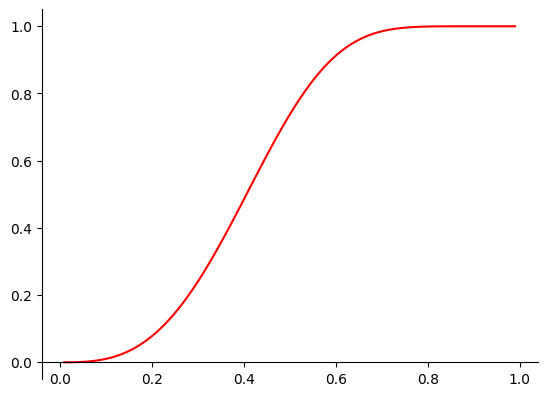

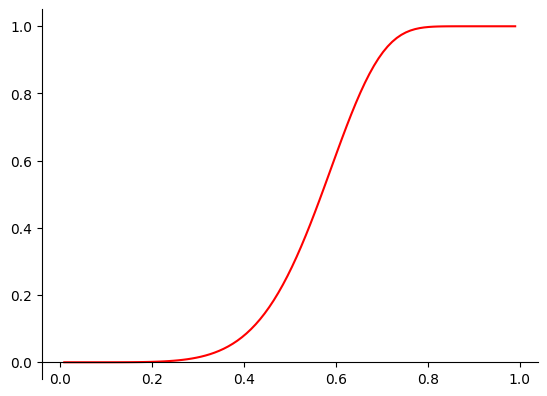

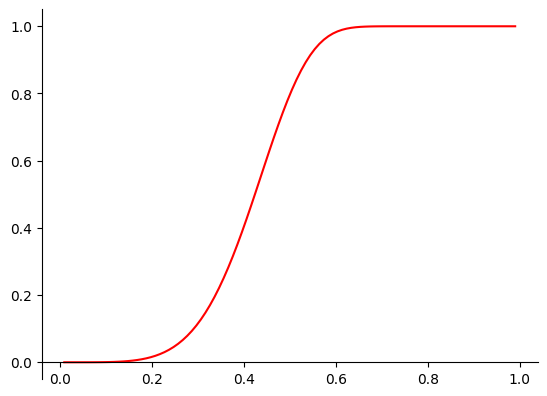

In [18]:
### YOUR CODE HERE
def s_curve(r, b):
    def s_func(s):
        return 1 - (1 - s**r)**b
    return s_func
### YOUR CODE HERE

x = np.linspace(0.01,0.99,100)
y_1 = s_curve(3,10)(x)
y_2 = s_curve(6,20)(x)
y_3 = s_curve(5,50)(x)

def plot_function(x,y): 
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.spines['bottom'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')

    # plot the function
    plt.plot(x,y, 'r')

    # show the plot
    plt.show()
    
plot_function(x,y_1)
plot_function(x,y_2)
plot_function(x,y_3)

### Task 3.3.2 

<span style='color: green'>**\[Describe\]**</span> For each of the (r,b) pairs in Task 3.2.1, compute the value of $s$ for which the value of $1-(1-s^r)^b$ is exactly 1/2. How does this value compare with the estimate of $(1/b)^{1/r}$

*******************
Increasing the value of $r$ reduces the probability of false negatives. This means that similar items are more likely to be found in the same bucket. However, increasing r also increases the number of candidate pairs that need to be verified, which can negatively impact the algorithm's efficiency.<br>
Increasing the value of b increases the probability of false positives, thus decreasing the precision of the LSH algorithm. This might have the effect that dissimilar items are more likely to be found in the same bucket. However, increasing b also reduces the number of candidate pairs that need to be verified, improving efficiency. <br>
Below are the computations for the three choices of $r$ and $b$: <br>
$$1 - (1 - 0.40609^3)^{10} \approx \frac{1}{2}$$
$$1 - (1 - 0.56935^6)^{20} \approx \frac{1}{2}$$
$$1 - (1 - 0.424394^5)^{50} \approx \frac{1}{2}$$
The corresponding values for the estimate is given just below: <br>
$$(\frac{1}{10})^{\frac{1}{3}} \approx 0.4641588833612779$$
$$(\frac{1}{20})^{\frac{1}{6}} \approx 0.6069622310029172$$
$$(\frac{1}{50})^{\frac{1}{5}} \approx 0.45730505192732634$$
As seen from the above the estimate kinda corresponds to the actual values of $s$, but is in some cases quite far from the correct value. 
******************